In [1]:
from transformers import CLIPModel
from PIL import Image 
import numpy as np 
from matplotlib import pyplot as plt 
import os 
import torch
from clip_dataset.retrieval_dataset import CLSDataset,RetrievalTransformPipeline
from torch.utils.data import DataLoader
from tqdm import tqdm 
import matplotlib.pyplot as plt
from PIL import Image
from clip_retrieval.utils import to_cuda
from clip_retrieval.clip_dataset.object_dataset import imread, crop
import cv2
from glob import glob
import pandas as pd

In [2]:
# path config:
checkpoint = '/cfsdata2/cfsdata/workspace/yunzhi/checkpoint/clip'
data_root ='/cfsdata2/cfsdata/workspace/yunzhi/data/clip_real_value'
work_dir = '/cfsdata2/cfsdata/workspace/yunzhi/clip_retrieval/work_dir/demo'
embeds_cache_path = os.path.join(work_dir, 'embeds_cache2.pt')
if not os.path.exists(work_dir):
    os.mkdir(work_dir)

# build transforms:
truncation = 'only_first'
pipeline = RetrievalTransformPipeline(checkpoint=checkpoint,keys=['text'],truncation=truncation)

# build dataset & dataloader
test_rate = 1.0    # 1表示训练集和测试集划分5 5 开
test_mode = True 
batch_size = 12
shuffle = False
sampling_limit = 1000    # 训练集有sampling_limit张，测试集合有test_rate * sampling_limit张
regenerate_image_queries = False
dataset = CLSDataset(data_root=data_root,
                      pipeline=pipeline,
                      sampling_limit=sampling_limit,
                      test_mode=test_mode,
                      test_rate=test_rate,
                      regenerate_image_queries=regenerate_image_queries)
dataloader = DataLoader(dataset, shuffle=shuffle, batch_size=batch_size,collate_fn=pipeline.collate_fn)
print(f"dataset len:{len(dataset)}")

# build CLIP model:
device = 2
model = CLIPModel.from_pretrained(checkpoint)
model = model.cuda(device)
model.eval()
pass

Model loaded succeed
三轮车.json loaded, map to tricycle, len: 2100,train: 1000, test: 1000, query: 100
货车.json loaded, map to truck, len: 2100,train: 1000, test: 1000, query: 100
巴士.json loaded, map to bus, len: 2100,train: 1000, test: 1000, query: 100
摩托车.json loaded, map to motorbike, len: 2100,train: 1000, test: 1000, query: 100
卡车.json loaded, map to truck, len: 2100,train: 1000, test: 1000, query: 100
test mode, load test data 5000
zh2en-class map:
tricycle : 1000
truck : 2000
bus : 1000
motorbike : 1000
dataset len:5000


In [8]:
dataset[0]

{'img': tensor([[[[-0.3178, -0.2594, -0.3470,  ...,  0.4559,  0.4559,  0.4413],
           [-0.2886, -0.2740, -0.4930,  ...,  0.4705,  0.4559,  0.4413],
           [-0.5952, -0.5076, -0.5514,  ...,  0.4705,  0.4559,  0.4413],
           ...,
           [ 0.1055,  0.0909,  0.1055,  ...,  0.1785,  0.2953,  0.6019],
           [ 0.1055,  0.1055,  0.1201,  ...,  0.1785,  0.1931,  0.2807],
           [ 0.1055,  0.1201,  0.1347,  ...,  0.1639,  0.2077,  0.1931]],
 
          [[-0.1012, -0.0412, -0.1613,  ...,  0.8442,  0.8442,  0.8292],
           [-0.0712, -0.0562, -0.3114,  ...,  0.8442,  0.8442,  0.8292],
           [-0.4014, -0.3264, -0.3714,  ...,  0.8292,  0.8442,  0.8292],
           ...,
           [ 0.0789,  0.0638,  0.0789,  ...,  0.1689,  0.3040,  0.6041],
           [ 0.0789,  0.0789,  0.0939,  ...,  0.1389,  0.1389,  0.2589],
           [ 0.0789,  0.0939,  0.1089,  ...,  0.1089,  0.1389,  0.1389]],
 
          [[-0.3142, -0.2289, -0.2004,  ...,  1.4491,  1.4491,  1.4349],
      

## show image in dataset

{'text': '骑摩托车', 'key_points': None, 'bbox': {'x1': 2583.56, 'x2': 2735.02, 'y1': 1239.08, 'y2': 1520.02}}
{'text': '骑三轮车', 'key_points': None, 'bbox': {'x1': 91.2261, 'x2': 286.153, 'y1': 1245.41, 'y2': 1519.48}}
{'text': '货车', 'key_points': None, 'bbox': {'x1': 1737.19, 'x2': 1973.59, 'y1': 1123.02, 'y2': 1430.52}}
{'text': 'SUV', 'key_points': None, 'bbox': {'x1': 1912.25, 'x2': 2077.7, 'y1': 1229.86, 'y2': 1375.14}}
{'text': '骑摩托车', 'key_points': None, 'bbox': {'x1': 2095.62, 'x2': 2140.31, 'y1': 1239.04, 'y2': 1360.18}}
{'text': '轿车', 'key_points': None, 'bbox': {'x1': 850.342, 'x2': 1073.57, 'y1': 1273.27, 'y2': 1423.71}}
{'text': '货车', 'key_points': None, 'bbox': {'x1': 1197.03, 'x2': 1385.69, 'y1': 1139.71, 'y2': 1407.99}}
{'text': '货车', 'key_points': None, 'bbox': {'x1': 837.78, 'x2': 1016.56, 'y1': 1222.37, 'y2': 1412.9}}
{'text': '骑三轮车', 'key_points': None, 'bbox': {'x1': 2225.13, 'x2': 2305.48, 'y1': 1241.77, 'y2': 1352.66}}
{'text': '骑摩托车', 'key_points': None, 'bbox': {'x1

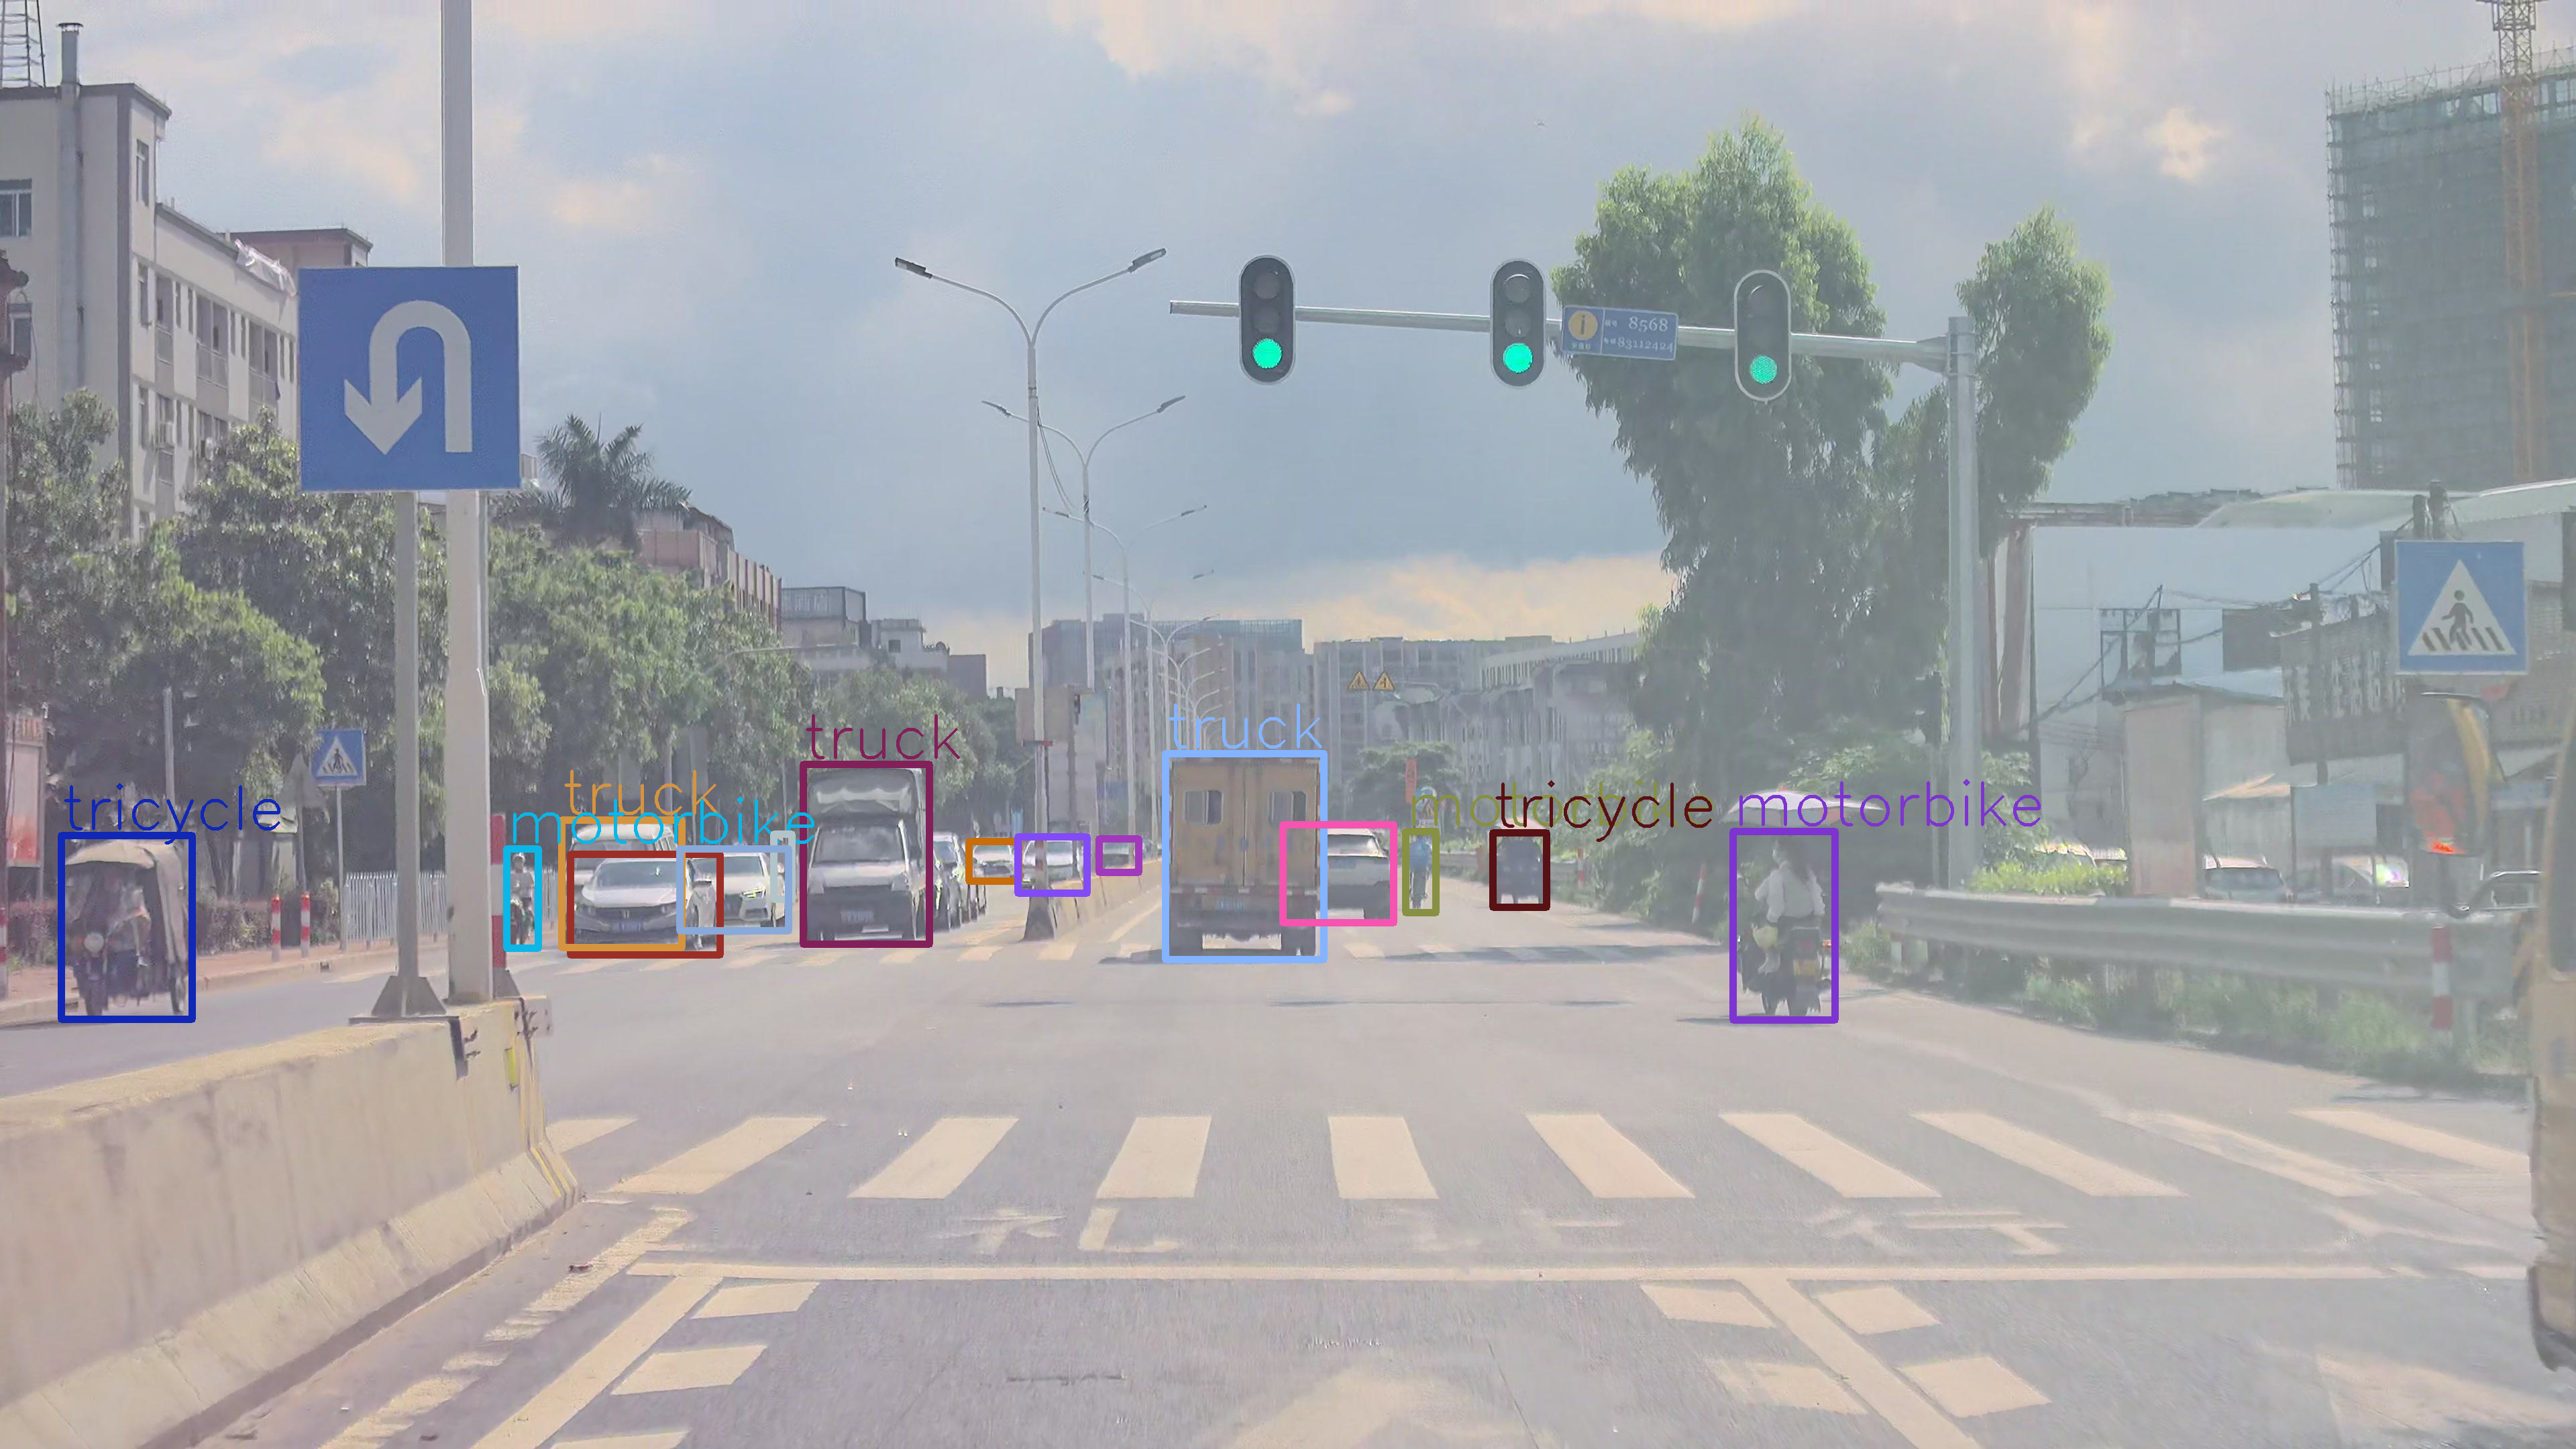

In [3]:
img = dataset.vis_data(206,font_size=3.0)

In [8]:
h, w = img.shape[:2]
h, w, h / 224, w / 224

(2160, 3840, 9.642857142857142, 17.142857142857142)

In [9]:
with torch.no_grad():
    for data in dataloader:
        if 'text' in data: 
            data.pop('text')
        data = to_cuda(data, device=model.device)
        out = model(**data)
        break
out_keys = [k for k in out if out[k] is not None] 
input_keys = [k for k in data if data[k] is not None]
print("output keys:", out_keys)
print("input keys:", input_keys)

output keys: ['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output']
input keys: ['input_ids', 'attention_mask', 'pixel_values']


## Get Image Embeddings in Dataset:

In [10]:
embeds_cache = []
if not os.path.exists(embeds_cache_path):
    with torch.no_grad():
        for data in tqdm(dataloader,desc="Generate image embeds"):
            # to model's GPU:
            images = data['pixel_values']
            images = images.to(model.device)

            # get embedding & frobenius norm to 1
            out = model.get_image_features(images)
            out /= out.norm(p=2,dim=-1, keepdim=True)
            embeds_cache.append(out)
    embeds_cache = torch.cat(embeds_cache, dim=0)
    print(f"save embeds_cache at {embeds_cache_path}")
    torch.save(embeds_cache, embeds_cache_path)
else:
    print(f"load embeds cache at {embeds_cache_path}")
    embeds_cache = torch.load(embeds_cache_path).to(model.device)
print("embeds_cache shape:", embeds_cache.shape)
assert embeds_cache.shape == (len(dataset), 512)    # dataset所有的图片都被嵌入到了512维度
assert embeds_cache.norm(p=2, dim=-1).sum().cpu().long().item() == len(dataset)    # 所有的representation模长为1

load embeds cache at /cfsdata2/cfsdata/workspace/yunzhi/clip_retrieval/work_dir/demo/embeds_cache2.pt
embeds_cache shape: torch.Size([5000, 512])


## Read Image Query

Text query:  货车
Example image querys: 
./images/bus.jpeg
./images/motorbike.jpeg
./images/tricycle.jpeg
./images/truck.jpeg
Read image query at  ./images/truck.jpeg


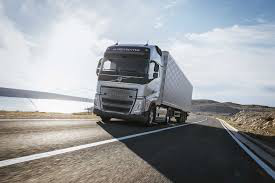

In [11]:
############################################
## 修改image query的时候记得修改text query
############################################
# query_key = 0
# text_query='巴士'
############################################
# query_key = 1
# text_query='摩托车'
############################################
# query_key = 2
# text_query='三轮车'    
############################################
query_key = 3
text_query='货车'
############################################
# query_key = 3
# text_query='卡车'
############卡车和货车英文都是truck############
assert text_query in ['三轮车','货车','巴士','摩托车','卡车']
print("Text query: ", text_query)

example_imgs = glob("./images/*.jpeg")
print("Example image querys: ")
for path in example_imgs:
    print(path)

image_query = Image.open(example_imgs[query_key])
print("Read image query at ", example_imgs[query_key])

image_query.show()

In [13]:
def get_image_features(img, pipeline, model):
    pixel_values = pipeline.img_processor(img, return_tensors="pt")['pixel_values'][0]
    pixel_values = pixel_values[None, :, :, :]
    pixel_values  =pixel_values.to(model.device)
    with torch.no_grad():
        pixel_values = model.get_image_features(pixel_values)
        pixel_values /= pixel_values.norm(p=2,dim=-1, keepdim=True)
        return pixel_values
query_embedding = get_image_features(img=image_query, pipeline=pipeline, model=model)
print(query_embedding.shape)

torch.Size([1, 512])


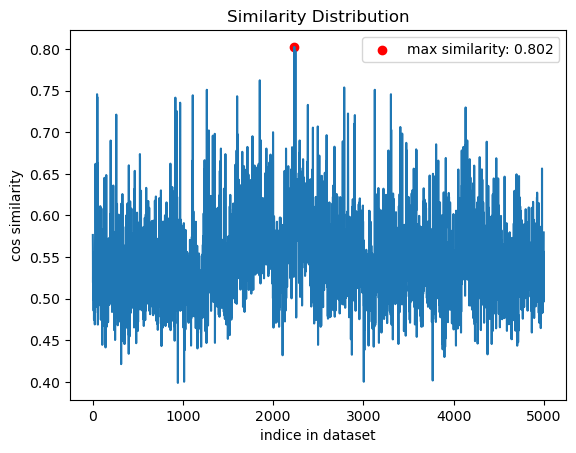

img index with max similarity in dataset:2234
Find 5 货车 in image 2234 in dataset
Find 3 货车 in image 2246 in dataset
Find 3 货车 in image 1851 in dataset
Find 1 货车 in image 2787 in dataset
Find 2 货车 in image 1264 in dataset
Find 2 货车 in image 3126 in dataset


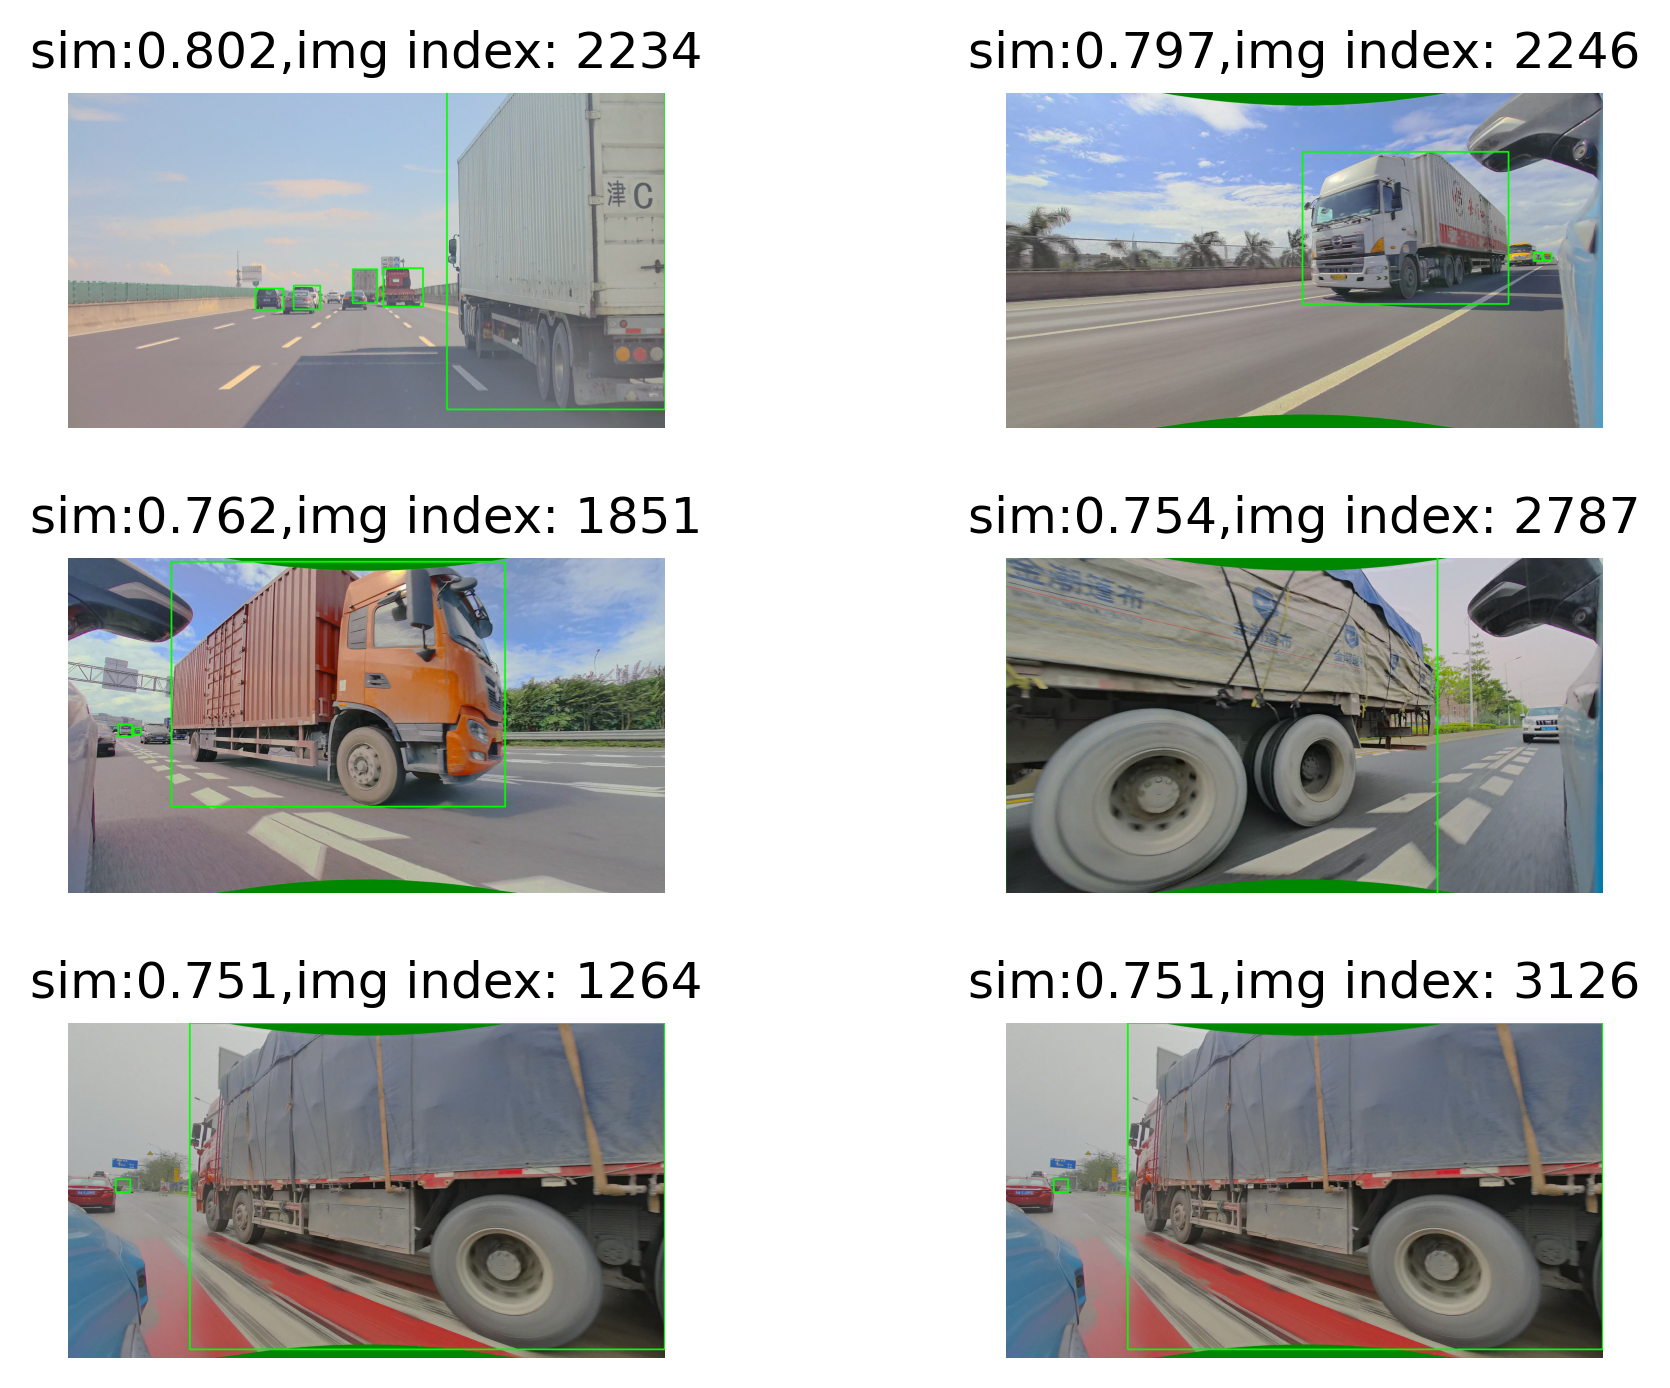

In [14]:
def show_cos_similarity(query_embedding,
                         embeds_cache, 
                         dataset, 
                         top_k=6, 
                         columns=2, 
                         dpi=300,
                         query_class=None):
    # [1,512] @ [512, N] -> [1, N]
    cos_sims = query_embedding @ embeds_cache.t()
    cos_sims = cos_sims.cpu().numpy()
    if len(cos_sims.shape) == 2 and cos_sims.shape[0] == 1:
        cos_sims = cos_sims[0]
    
    # y: [N]
    y = cos_sims 
    x = np.arange(len(y))
    query_result = np.argmax(y)
    plt.plot(x,y)
    plt.scatter(query_result, y[query_result],color='red',label='max similarity: {:.3f}'.format(y[query_result]))
    plt.legend()
    plt.title('Similarity Distribution')
    plt.xlabel('indice in dataset')
    plt.ylabel('cos similarity')
    plt.show()
    print(f"img index with max similarity in dataset:{query_result}")

    rank = sorted(x, key=lambda _x: cos_sims[_x],reverse=True)
    query_result = y[rank]

    # get result images:
    result_imgs = []
    for i in rank[:top_k]:
        img = dataset.imread(i, query_class=query_class)
        result_imgs.append(img)


    fig, axes = plt.subplots(top_k//columns, columns,dpi=dpi)
    fig.tight_layout()
    for row in range(top_k//columns):
        for col in range(columns):
            axes[row,col].imshow(result_imgs[columns * row + col])
            axes[row,col].set_title('sim:{:.3f},img index: {}'.format(query_result[columns * row + col], rank[columns * row + col]))
            axes[row,col].axis('off')
    fig.show()
    
query_result = show_cos_similarity(query_embedding=query_embedding,
                                    embeds_cache=embeds_cache,
                                    dataset=dataset, 
                                    top_k=6, 
                                    columns=2, 
                                    dpi=300,
                                    query_class=text_query)